In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('./Resources/best_quarterly_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Market Return,Portfolio Return
Date,,
2018-07-02,1.002766,1.004025
2018-07-03,0.998673,0.996879
2018-07-05,1.007006,1.005218
2018-07-06,1.015414,1.013535
2018-07-09,1.024706,1.025498


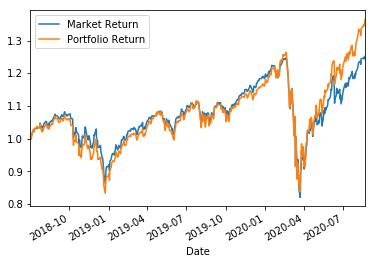

In [3]:
df.plot()

In [4]:
portfolio = df["Portfolio Return"].to_frame().dropna()
portfolio.head(2)

,Portfolio Return
Date,
2018-07-02,1.004025
2018-07-03,0.996879


### Augmented Dickey-Fuller Test

In [5]:
from statsmodels.tsa.stattools import adfuller
adfuller(portfolio)

(-1.1394311383180895,
 0.6990939159580201,
 9,
 528,
 {'1%': -3.4427957890025533,
  '5%': -2.867029512430173,
  '10%': -2.5696937122646926},
 -2790.51622720068)

P-value is more than 0.05 indicating the data is non-statinary

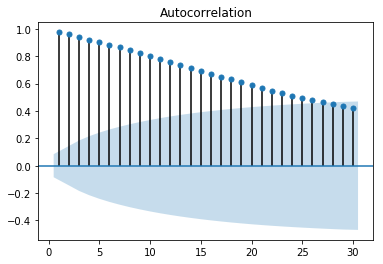

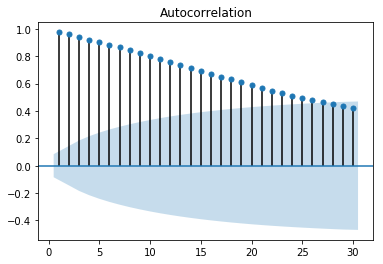

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the autocorrelation of the Settle Prices
plot_acf(portfolio, zero=False, lags=30)

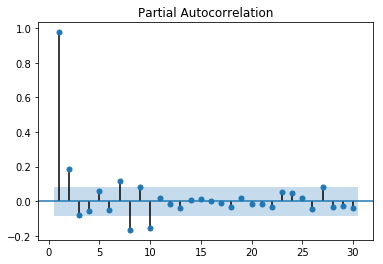

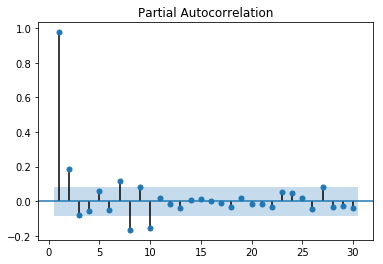

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(portfolio, zero=False, lags=30)

In [8]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(portfolio,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2855.378, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2815.682, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2854.027, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2844.693, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2816.894, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2855.673, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2858.440, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2860.851, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2863.042, Time=0.55 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2862.950, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2860.536, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2892.357, Time=1.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2857.530, Time=1.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2859.492, Time=0.90 sec
 ARIMA(4,1,2)(0,0,0

In [9]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(3, 1, 1)   Log Likelihood                1452.178
Date:                Wed, 26 Aug 2020   AIC                          -2892.357
Time:                        11:50:45   BIC                          -2866.641
Sample:                             0   HQIC                         -2882.297
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      0.828      0.408      -0.002       0.004
ar.L1         -1.1128      0.036    -30.751      0.000      -1.184      -1.042
ar.L2         -0.1019      0.038     -2.650      0.008      -0.177      -0.027
ar.L3          0.2212      0.025      8.994      0.000       0.173       0.269
ma.L1          0.8875      0.029     30.403      0.000       0.830       0.945
sigma2         0.0003   8.06e-06     32.387      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       50.07   Jarque-Bera (JB):              1253.21
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               4.17   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Model

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
# Create an ARIMA model
model = ARIMA(portfolio, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
# Fit the model to the data
results = model.fit()

In [13]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Portfolio Return   No. Observations:                  537
Model:                 ARIMA(7, 1, 1)   Log Likelihood                1461.060
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 26 Aug 2020   AIC                          -2902.121
Time:                        11:50:47   BIC                          -2859.261
Sample:                             1   HQIC                         -2885.354
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0007      0.001      0.993      0.321      -0.001       0.002
ar.L1.D.Portfolio Return    -0.7743      0.099     -7.828      0.000      -0.968      -0.580
ar.L2.D.Portfolio Return    -0.0085      0.058     -0.147      0.883      -0.121       0.104
ar.L3.D.Portfolio Return     0.1531      0.055      2.778      0.005       0.045       0.261
ar.L4.D.Portfolio Return    -0.0305      0.055     -0.554      0.579      -0.138       0.077
ar.L5.D.Portfolio Return    -0.0304      0.054     -0.562      0.574      -0.137       0.076
ar.L6.D.Portfolio Return    -0.0695      0.054     -1.282      0.200      -0.176       0.037
ar.L7.D.Portfolio Return     0.1281      0.051      2.504      0.012       0.028       0.228
ma.L1.D.Portfolio Return     0.6129      0.093      6.588      0.000       0.431       0.795
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0014           -0.4337j            1.0913           -0.4350
AR.2           -1.0014           +0.4337j            1.0913            0.4350
AR.3           -0.4993           -1.2347j            1.3318           -0.3112
AR.4           -0.4993           +1.2347j            1.3318            0.3112
AR.5            0.9783           -1.1710j            1.5259           -0.1392
AR.6            0.9783           +1.1710j            1.5259            0.1392
AR.7            1.5869           -0.0000j            1.5869           -0.0000
MA.1           -1.6316           +0.0000j            1.6316            0.5000
-----------------------------------------------------------------------------
"""

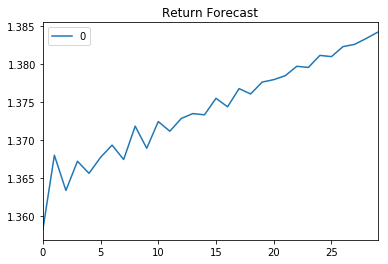

In [14]:
# create a dataframe that holds the forecast values.
return_forecast = pd.DataFrame(results.forecast(steps=30)[0])
# Visualize the forecast
return_forecast.plot(title="Return Forecast")

## Forecast Market Return 

In [15]:
market = df["Market Return"].to_frame().dropna()
market.head(2)

,Market Return
Date,
2018-07-02,1.002766
2018-07-03,0.998673


In [16]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(market,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2946.308, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2907.627, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2942.425, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2932.675, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2909.181, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2951.490, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2952.185, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2953.594, Time=0.42 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2960.419, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2960.733, Time=0.53 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2965.183, Time=0.60 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-2989.695, Time=0.98 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-2999.727, Time=1.84 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2989.848, Time=1.61 sec
 ARIMA(7,1,2)(0,0,0

In [17]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1510.359
Date:                Wed, 26 Aug 2020   AIC                          -3002.719
Time:                        11:51:08   BIC                          -2964.145
Sample:                             0   HQIC                         -2987.629
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7080      0.081     -8.757      0.000      -0.866      -0.550
ar.L2          0.0545      0.032      1.685      0.092      -0.009       0.118
ar.L3          0.1549      0.031      4.936      0.000       0.093       0.216
ar.L4         -0.0785      0.031     -2.500      0.012      -0.140      -0.017
ar.L5         -0.0439      0.038     -1.152      0.249      -0.119       0.031
ar.L6         -0.0409      0.035     -1.160      0.246      -0.110       0.028
ar.L7          0.1657      0.034      4.824      0.000       0.098       0.233
ma.L1          0.5695      0.082      6.913      0.000       0.408       0.731
sigma2         0.0002   6.45e-06     32.684      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.98   Jarque-Bera (JB):              1438.93
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Create an ARIMA model
model_1 = ARIMA(market, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
# Fit the model to the data
results_1 = model_1.fit()

In [20]:
# Print the model summary
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Market Return   No. Observations:                  537
Model:                 ARIMA(7, 1, 1)   Log Likelihood                1510.616
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 26 Aug 2020   AIC                          -3001.232
Time:                        11:51:10   BIC                          -2958.372
Sample:                             1   HQIC                         -2984.465
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0005      0.001      0.717      0.474      -0.001       0.002
ar.L1.D.Market Return    -0.7104      0.102     -6.942      0.000      -0.911      -0.510
ar.L2.D.Market Return     0.0516      0.055      0.932      0.351      -0.057       0.160
ar.L3.D.Market Return     0.1529      0.054      2.824      0.005       0.047       0.259
ar.L4.D.Market Return    -0.0803      0.053     -1.521      0.128      -0.184       0.023
ar.L5.D.Market Return    -0.0454      0.053     -0.863      0.388      -0.149       0.058
ar.L6.D.Market Return    -0.0408      0.052     -0.780      0.435      -0.143       0.062
ar.L7.D.Market Return     0.1652      0.050      3.300      0.001       0.067       0.263
ma.L1.D.Market Return     0.5714      0.098      5.805      0.000       0.378       0.764
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9961           -0.4352j            1.0870           -0.4344
AR.2           -0.9961           +0.4352j            1.0870            0.4344
AR.3           -0.5160           -1.2106j            1.3159           -0.3141
AR.4           -0.5160           +1.2106j            1.3159            0.3141
AR.5            0.8950           -1.0937j            1.4132           -0.1408
AR.6            0.8950           +1.0937j            1.4132            0.1408
AR.7            1.4811           -0.0000j            1.4811           -0.0000
MA.1           -1.7500           +0.0000j            1.7500            0.5000
-----------------------------------------------------------------------------
"""

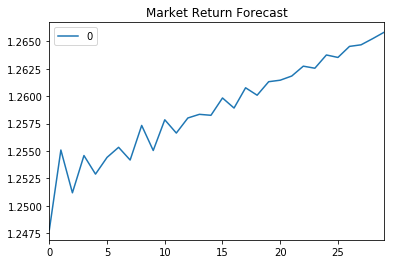

In [21]:
# create a dataframe that holds the forecast values.
market_return_forecast = pd.DataFrame(results_1.forecast(steps=30)[0])

# Visualize the forecast
market_return_forecast.plot(title="Market Return Forecast")

In [22]:
# concatenate the dataframes
forecast_df = pd.concat([market_return_forecast, return_forecast], axis=1)
forecast_df.columns = [ "Market Return Forecast", "Portfolio Return Forecast"]
forecast_df.index = pd.bdate_range(start='8/24/2020', periods = 30)
forecast_df.tail()

,Market Return Forecast,Portfolio Return Forecast
2020-09-28,1.263524,1.380973
2020-09-29,1.264530,1.382284
2020-09-30,1.264674,1.382585
2020-10-01,1.265232,1.383353
2020-10-02,1.265821,1.384182


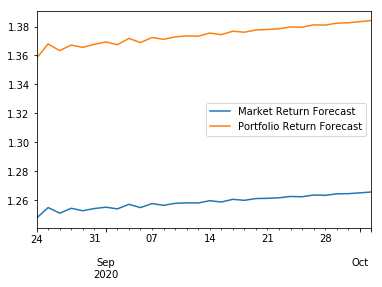

In [23]:
forecast_df.plot()

In [24]:
final_df = pd.concat([df, forecast_df], axis=0, sort=False)

<Figure size 432x288 with 0 Axes>

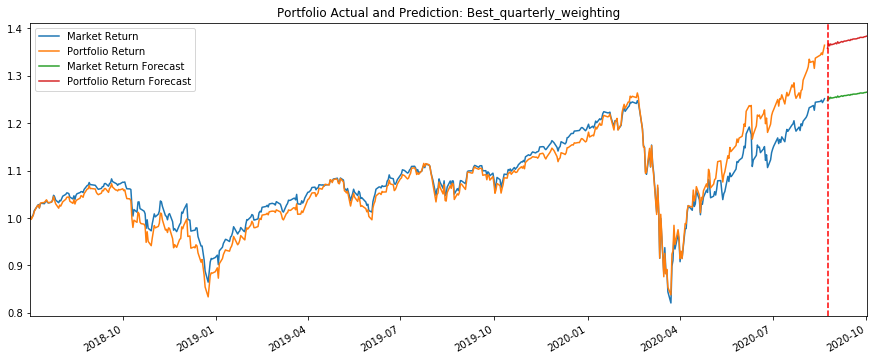

In [25]:
plt.figure();
final_df.plot(figsize=(15,6))
plt.title('Portfolio Actual and Prediction: Best_quarterly_weighting')
plt.axvline(forecast_df.index[0], color='r', linestyle='--')